In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import SelectKBest, f_classif
import pylab
import scipy
import sklearn
import time
import seaborn as sns
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [2]:
pd.set_option("display.max_rows", 250000)

In [3]:
df = pd.read_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/GSE59114.csv', header = 1)
df1 = df.T
df1.columns = df1.loc['Gene Symbol'].reset_index()
df1 = df1.drop(['Gene Symbol', 'UCSC transcripts'])
df1.columns = [x[1] for x in df1.columns]
df1.columns = df1.columns.str.replace("'", "")
df1.shape

(1434, 8422)

Itgam, Ly6g, Ptprc, Cd3e, Ly76, Kit, Ly6a, Cd48, Slamf1

In [4]:
import re
df1_1 = df1[~df1.index.str.contains('biol_replicate')]
df1_1 = df1_1.drop(['\'Young LT-HSC\'','\'Young ST-HSC\'', '\'Young MPP\'','\'Old LT-HSC\'', '\'Old ST-HSC\'','Old MPP\''])
df1_1 = df1_1.drop(['Itgam', 'Ptprc', 'Kit', 'Ly6a', 'Cd48', 'Slamf1'], axis = 1)

In [5]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, young_LT_HSC_2 to old_MPP_168
Columns: 8416 entries, Npl to Sft2d1
dtypes: object(8416)
memory usage: 67.9+ MB


In [6]:
df1_1.index = df1_1.index.str.replace(r'[^a-zA-Z]', '')

print((df1_1.columns).shape)
print(np.unique(df1_1.columns).shape)

(8416,)
(8351,)


In [7]:
df1_1dup = df1_1[df1_1.loc[:,df1_1.columns.duplicated()].columns]


In [8]:
dupcols = np.unique(df1_1dup.columns)
dupcols

array(['Abcg2', 'Arih1', 'Atf7ip', 'Atrip', 'Brwd1', 'Cbx1', 'Ccnd3',
       'Cdk6', 'Celf1', 'Commd1', 'Csnk1a1', 'Ctse', 'Dnajb6', 'Eci2',
       'Eif1ax', 'Fgd4', 'Fus', 'G3bp1', 'Glod4', 'Gm10598', 'Gm13215',
       'Hjurp', 'Ikbkb', 'Ing4', 'Itga4', 'Itga6', 'Kansl2', 'Lcor',
       'Lrrc29', 'Luc7l2', 'Mafg', 'Mecom', 'Mob1a', 'Mtcp1', 'Nagk',
       'Ndufa3', 'Pafah1b1', 'Patz1', 'Pcif1', 'Pik3ip1', 'Psme4', 'Pten',
       'Ramp2', 'Rpl24', 'Rspry1', 'Satb1', 'Smarcc2', 'Srcap', 'Srsf10',
       'Sugp2', 'Taf9', 'Tex261', 'Tmem167b', 'Tmem181b-ps', 'Trappc9',
       'Trim30b', 'U2af1l4', 'Utp23', 'Wwp2', 'Zbtb20', 'Zfp708',
       'Zfp869', 'Zgpat'], dtype=object)

In [9]:
df1_1dupgroup = df1_1dup.groupby(df1_1dup.columns, axis=1).sum()

In [10]:
df1_1dupmean = pd.DataFrame()
for x in dupcols:
    df1_1dupmean[x] = df1_1dupgroup[x]/df1_1dup.columns.tolist().count(x)


In [11]:
# cols = []
# n = 1
# for x in df2dup.columns:
#     if x in cols:
#         cols.append(x+'.'+str(n))
#         n += 1
#     else:
#         cols.append(x)
#         n = 1


In [12]:
dfnodup = df1_1.loc[:,~df1_1.columns.duplicated()].drop(dupcols, axis = 1)

df2 = pd.concat([dfnodup, df1_1dupmean], axis = 1)

df2= df2.round(2)
df2.shape

(1058, 8351)

In [13]:
genefracs = (df2==0).sum()/(df2==0).count()
passindex = genefracs[genefracs < 0.20]


In [14]:
zifa = df2[passindex.index]
zifa= np.round(zifa.astype(np.float64),4)
zifa = np.array(zifa)
zifa.shape

(1058, 1052)

In [15]:
from ZIFA import ZIFA
from ZIFA import block_ZIFA

In [16]:
start_time = time.time()
Z, model_params = block_ZIFA.fitModel(zifa, 20)
print("--- %s seconds ---" % (time.time() - start_time))

Filtering out all genes which are zero in more than 95.0% of samples. To change this, change p0_thresh.
Number of blocks has been set to 2
Running block zero-inflated factor analysis with N = 1058, D = 1052, K = 20, n_blocks = 2
Block sizes [526, 526]
Param change below threshold 1.000e-02 after 10 iterations
--- 200.61889505386353 seconds ---


In [17]:
dfz = pd.DataFrame(Z, index = df2.index)
dfz

0         1         2         3         4         5  \
youngLTHSC -0.515937  0.143064 -0.078065 -0.239805  2.181806  1.604397   
youngLTHSC -1.058694 -0.225391  0.796593 -0.307745  0.678372  1.527334   
youngLTHSC -1.579616  1.419082  0.102176  0.406265  0.947173  2.241876   
youngLTHSC -0.269517 -0.388248 -0.069956  0.457136  0.278340  4.973603   
youngLTHSC  0.285786 -1.636523 -0.801868 -0.068922  1.542457  4.103764   
youngLTHSC -0.399143  0.455229 -0.449324 -0.562802 -0.207239  1.190517   
youngLTHSC -1.317701  2.133408  0.728650 -0.267692  0.685906  0.558971   
youngLTHSC -1.378221  0.799828  0.436485 -0.748452  0.040203  0.362108   
youngLTHSC  0.079077  0.021126  1.060512 -0.986393 -0.997040  0.961454   
youngLTHSC  0.156202  1.926580  0.307958 -0.453297 -2.840734  0.516300   
youngLTHSC  2.187648  2.148379  0.614618 -1.299593 -1.595845  3.319621   
youngLTHSC -0.440935  1.504982  1.289753 -0.625021 -2.192628  0.975326   
youngLTHSC  0.787619  2.367062  2.998724 -1.403340 -0.001312 -0.964585   
youngLTHSC -1.809975  2.178741  1.006138 -0.731376 -1.047367  1.061410   
youngLTHSC -0.616648  0.604992  0.395454 -0.743906 -0.117795  0.456485   
youngLTHSC  2.356666  1.601366 -0.259992 -1.373031 -1.636901 -0.954998   
youngLTHSC  0.520001  0.608110  1.215193 -1.559300  0.867211  0.598245   
youngLTHSC  1.325919  1.264386  1.409774 -1.169802  0.382308 -0.717772   
youngLTHSC -1.151624  0.677390  1.351684 -0.511397 -1.261994  1.291635   
youngLTHSC -0.520214  0.316697  0.999845  0.108304  0.030862  2.998654   
youngLTHSC  1.134284  0.077695 -0.444225 -1.121100  0.167692 -0.030348   
youngLTHSC  0.017792  1.668663  0.447081 -0.863756 -1.773046  0.409064   
youngLTHSC  0.279461  2.802780  2.330208 -2.026699 -2.654850  2.007613   
youngLTHSC  0.251971  1.362799 -0.653481 -0.510235 -1.987573  0.635776   
youngLTHSC  0.103261  1.276651 -0.468546 -0.532624 -0.945473  0.093146   
youngLTHSC  0.681606  0.700176  0.455377 -1.482265  1.566157 -0.699168   
youngLTHSC  0.390966  1.418523 -0.850235 -0.824129 -1.171185 -0.487908   
youngLTHSC  0.795036  1.713173 -0.614025 -1.328224 -1.473770 -1.278437   
youngLTHSC -0.122253  2.172394 -0.356939 -0.671684  0.309954 -0.463639   
youngLTHSC -1.304696  0.154236  1.034237 -0.258811 -0.841587  1.077793   
youngLTHSC  1.454814  1.552230  0.565758 -1.456314 -3.676279  1.626414   
youngLTHSC  1.210954  0.888575  0.975807 -0.910927 -2.632509  1.595457   
youngLTHSC  0.726473  1.445396  0.508369 -1.331505 -1.596068 -1.379073   
youngLTHSC -0.550473  0.383963  2.101199 -1.082959 -1.978926  0.663169   
youngLTHSC -0.940231  1.897711 -0.469842  0.083672 -1.694519  0.742372   
youngLTHSC -0.146039  1.564477  0.626165 -0.899921 -0.602070  0.099678   
youngLTHSC -0.485004  3.858230  2.580727 -1.852812  0.400948  0.402408   
youngLTHSC  0.429601  0.637608 -0.406355 -0.526381 -1.552618  1.247814   
youngLTHSC  2.400589  2.135416  1.229197 -2.231962  0.290830 -0.664786   
youngLTHSC  1.053555  0.066476  1.495455 -2.138389 -0.004335 -0.394904   
youngLTHSC -0.709700  0.782481  0.559540 -0.440633 -1.889548  1.257840   
youngLTHSC  1.807714  1.864477  2.870009 -3.019518 -0.178928  0.423699   
youngLTHSC -0.472539  1.578582  3.081864 -1.251418  0.211056  1.714939   
youngLTHSC  1.141425  3.165873  2.022538 -2.376687 -0.606757 -0.194334   
youngLTHSC -0.421395  0.599035  1.202854 -1.004063  0.101055  3.400805   
youngLTHSC -0.124429  2.228104  1.419953 -1.061831  0.498284  0.597926   
youngLTHSC  0.459542  1.453986  0.596892 -1.427633 -0.504912 -0.189621   
youngLTHSC  0.210933  1.129870  0.168667 -1.194538 -0.354479  0.124363   
youngLTHSC  0.296143  0.371966  0.630845 -0.973630 -1.273134  0.398131   
youngLTHSC  1.131163  1.166418  1.015170 -1.444898 -0.971524 -1.224843   
youngLTHSC -1.276605  1.034807 -0.675543  0.078309 -0.999401 -0.350261   
youngLTHSC  0.322766  0.116799  2.209177 -1.649023 -0.981059  1.768068   
youngLTHSC  0.782873  0.340402  2.140291 -1.452679  0.217768  2.121544   
youngLTHSC  2.757790  0

In [18]:
dfz.describe()

0            1            2            3            4   \
count  1058.000000  1058.000000  1058.000000  1058.000000  1058.000000   
mean     -0.001086     0.001454    -0.033810     0.005049    -0.000196   
std       1.007381     0.971425     1.082046     1.103138     1.086806   
min      -2.368263    -3.580824    -2.419380    -3.019518    -3.676279   
25%      -0.704868    -0.640593    -0.801204    -0.814138    -0.711966   
50%      -0.136749    -0.012752    -0.199073    -0.168992     0.022702   
75%       0.566098     0.617496     0.618185     0.931493     0.679486   
max       3.897287     4.203391     4.801425     2.788643     5.124586   

                5            6            7            8            9   \
count  1058.000000  1058.000000  1058.000000  1058.000000  1058.000000   
mean     -0.011111     0.000214     0.001623    -0.000604     0.008508   
std       1.062950     0.986581     1.000139     0.940591     0.907998   
min      -4.082001    -4.193595    -3.041820    -2.980398    -2.603166   
25%      -0.671626    -0.605052    -0.694848    -0.630915    -0.632880   
50%      -0.089365    -0.030037    -0.020338    -0.073945    -0.025449   
75%       0.548787     0.606516     0.656253     0.537623     0.555187   
max       6.940494     4.956117     5.385688     5.965948     3.427709   

                10           11           12           13           14  \
count  1058.000000  1058.000000  1058.000000  1058.000000  1058.000000   
mean     -0.003615     0.002950    -0.002375    -0.000485    -0.002884   
std       0.890036     0.884154     0.868840     0.826328     0.804968   
min      -3.496692    -2.359916    -2.802869    -2.690006    -2.870596   
25%      -0.552276    -0.586134    -0.569070    -0.530512    -0.558415   
50%      -0.050409    -0.070087     0.028729    -0.048378    -0.022499   
75%       0.536888     0.513447     0.556809     0.466919     0.476676   
max       3.681094     3.441540     2.863051     4.230622     4.189988   

                15           16           17           18           19  
count  1058.000000  1058.000000  1058.000000  1058.000000  1058.000000  
mean      0.000829    -0.001643     0.000647     0.004061     0.000803  
std       0.789174     0.776229     0.776841     0.780334     0.744536  
min      -2.920737    -3.017865    -3.346877    -3.724111    -2.942374  
25%      -0.503020    -0.479868    -0.465862    -0.472697    -0.426614  
50%       0.009481    -0.021851    -0.018757    -0.025158     0.015975  
75%       0.462340     0.465031     0.466629     0.500550     0.450928  
max       3.934039     3.392235     3.669614     3.844923     3.722363

In [19]:
dfz[[0,1,2,3,4]]

0         1         2         3         4
youngLTHSC -0.515937  0.143064 -0.078065 -0.239805  2.181806
youngLTHSC -1.058694 -0.225391  0.796593 -0.307745  0.678372
youngLTHSC -1.579616  1.419082  0.102176  0.406265  0.947173
youngLTHSC -0.269517 -0.388248 -0.069956  0.457136  0.278340
youngLTHSC  0.285786 -1.636523 -0.801868 -0.068922  1.542457
youngLTHSC -0.399143  0.455229 -0.449324 -0.562802 -0.207239
youngLTHSC -1.317701  2.133408  0.728650 -0.267692  0.685906
youngLTHSC -1.378221  0.799828  0.436485 -0.748452  0.040203
youngLTHSC  0.079077  0.021126  1.060512 -0.986393 -0.997040
youngLTHSC  0.156202  1.926580  0.307958 -0.453297 -2.840734
youngLTHSC  2.187648  2.148379  0.614618 -1.299593 -1.595845
youngLTHSC -0.440935  1.504982  1.289753 -0.625021 -2.192628
youngLTHSC  0.787619  2.367062  2.998724 -1.403340 -0.001312
youngLTHSC -1.809975  2.178741  1.006138 -0.731376 -1.047367
youngLTHSC -0.616648  0.604992  0.395454 -0.743906 -0.117795
youngLTHSC  2.356666  1.601366 -0.259992 -1.373031 -1.636901
youngLTHSC  0.520001  0.608110  1.215193 -1.559300  0.867211
youngLTHSC  1.325919  1.264386  1.409774 -1.169802  0.382308
youngLTHSC -1.151624  0.677390  1.351684 -0.511397 -1.261994
youngLTHSC -0.520214  0.316697  0.999845  0.108304  0.030862
youngLTHSC  1.134284  0.077695 -0.444225 -1.121100  0.167692
youngLTHSC  0.017792  1.668663  0.447081 -0.863756 -1.773046
youngLTHSC  0.279461  2.802780  2.330208 -2.026699 -2.654850
youngLTHSC  0.251971  1.362799 -0.653481 -0.510235 -1.987573
youngLTHSC  0.103261  1.276651 -0.468546 -0.532624 -0.945473
youngLTHSC  0.681606  0.700176  0.455377 -1.482265  1.566157
youngLTHSC  0.390966  1.418523 -0.850235 -0.824129 -1.171185
youngLTHSC  0.795036  1.713173 -0.614025 -1.328224 -1.473770
youngLTHSC -0.122253  2.172394 -0.356939 -0.671684  0.309954
youngLTHSC -1.304696  0.154236  1.034237 -0.258811 -0.841587
youngLTHSC  1.454814  1.552230  0.565758 -1.456314 -3.676279
youngLTHSC  1.210954  0.888575  0.975807 -0.910927 -2.632509
youngLTHSC  0.726473  1.445396  0.508369 -1.331505 -1.596068
youngLTHSC -0.550473  0.383963  2.101199 -1.082959 -1.978926
youngLTHSC -0.940231  1.897711 -0.469842  0.083672 -1.694519
youngLTHSC -0.146039  1.564477  0.626165 -0.899921 -0.602070
youngLTHSC -0.485004  3.858230  2.580727 -1.852812  0.400948
youngLTHSC  0.429601  0.637608 -0.406355 -0.526381 -1.552618
youngLTHSC  2.400589  2.135416  1.229197 -2.231962  0.290830
youngLTHSC  1.053555  0.066476  1.495455 -2.138389 -0.004335
youngLTHSC -0.709700  0.782481  0.559540 -0.440633 -1.889548
youngLTHSC  1.807714  1.864477  2.870009 -3.019518 -0.178928
youngLTHSC -0.472539  1.578582  3.081864 -1.251418  0.211056
youngLTHSC  1.141425  3.165873  2.022538 -2.376687 -0.606757
youngLTHSC -0.421395  0.599035  1.202854 -1.004063  0.101055
youngLTHSC -0.124429  2.228104  1.419953 -1.061831  0.498284
youngLTHSC  0.459542  1.453986  0.596892 -1.427633 -0.504912
youngLTHSC  0.210933  1.129870  0.168667 -1.194538 -0.354479
youngLTHSC  0.296143  0.371966  0.630845 -0.973630 -1.273134
youngLTHSC  1.131163  1.166418  1.015170 -1.444898 -0.971524
youngLTHSC -1.276605  1.034807 -0.675543  0.078309 -0.999401
youngLTHSC  0.322766  0.116799  2.209177 -1.649023 -0.981059
youngLTHSC  0.782873  0.340402  2.140291 -1.452679  0.217768
youngLTHSC  2.757790  0.687197  2.004250 -2.390678 -1.002322
youngLTHSC  0.979850  1.204999  0.246584 -1.355119 -1.170086
youngLTHSC  1.067453  1.067877  0.524665 -1.198253 -1.601723
youngLTHSC  1.913059  1.621260 -0.786407 -1.088794 -2.403355
youngLTHSC -0.411555  0.559066  1.964342 -1.439554  0.418471
youngLTHSC  0.933413  0.925462 -0.493836 -0.519116 -0.242019
youngLTHSC  0.034791  1.266840  1.454096 -1.403244  0.094188
youngLTHSC  1.672292  2.008916  0.786177 -1.249386 -1.277700
youngLTHSC  1.943755  0.988546  0.822940 -1.314682 -0.844399
youngLTHSC -0.457585 -0.457708  1.529926 -0.557137  0.230219
youngLTHSC -0.728152  1.107576  1.588199 -0.189065 -2.311572
youngLTHSC  1.721848  0.509100  0.372581 -1.626670 -1.

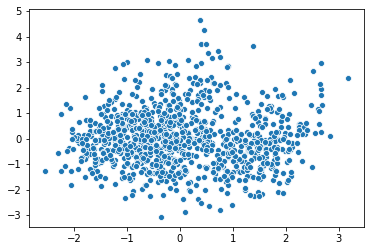

In [113]:
pcaz = PCA(n_components=3, random_state = 42)

zcomps = pcaz.fit_transform(dfz)
sns.scatterplot(zcomps[:,0], zcomps[:,1])
plt.show()

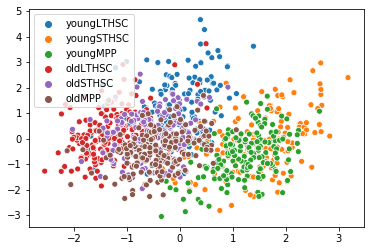

In [114]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = dfz.index)
plt.show()

In [132]:
encoded = {'oldLTHSC':0, 'oldMPP':1, 'oldSTHSC':2, 'youngLTHSC':3, 'youngMPP':4, 'youngSTHSC':5}
cells = ['oldLTHSC' ,'oldMPP', 'oldSTHSC', 'youngLTHSC' ,'youngMPP' ,'youngSTHSC']
cell_types = [encoded.get(x, x) for x in dfz.index]
colormap = ['r', 'b', 'g', 'y', 'c', 'm']
cell_colors = [colormap[x] for x in cell_types]
dfpca = pd.DataFrame(zcomps, index = dfz.index)
dfpca
fig = px.scatter_3d(dfpca, zcomps[:,0], zcomps[:,1],zcomps[:,2], dfpca.index)
fig.update_traces(marker=dict(opacity =1, size=4,
                              line=dict(width= .1)))

fig.show()

In [109]:
np.cov(dfz)

array([[ 0.94457834,  0.26937281,  0.58700035, ...,  0.02518583,
         0.14273978, -0.10412494],
       [ 0.26937281,  0.95792434,  0.38437843, ..., -0.16263798,
        -0.10377208, -0.10908843],
       [ 0.58700035,  0.38437843,  1.09057206, ..., -0.21192039,
         0.09650918, -0.13623246],
       ...,
       [ 0.02518583, -0.16263798, -0.21192039, ...,  0.55388577,
         0.06194078,  0.24308226],
       [ 0.14273978, -0.10377208,  0.09650918, ...,  0.06194078,
         0.3438493 ,  0.15431591],
       [-0.10412494, -0.10908843, -0.13623246, ...,  0.24308226,
         0.15431591,  0.66548657]])

Text(0.5, 1.0, 'ZIFA-UMAP (20 dim): genes with fewer than 20% zeros')

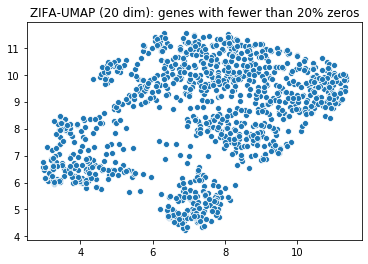

In [123]:
zumap = umap.UMAP(n_neighbors=20,
                      min_dist=.2,
                      metric='euclidean').fit_transform(dfz)
fig = sns.scatterplot(zumap[:,0], zumap[:,1])
fig.set_title('ZIFA-UMAP (20 dim): genes with fewer than 20% zeros')
#fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

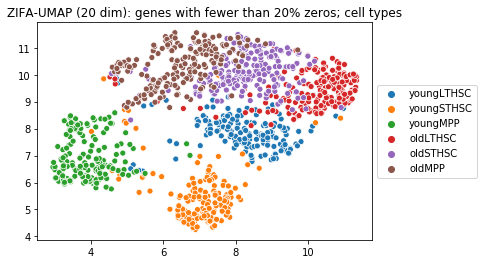

In [130]:
fig = sns.scatterplot(zumap[:,0], zumap[:,1], hue = dfz.index)
fig.set_title('ZIFA-UMAP (20 dim): genes with fewer than 20% zeros; cell types')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [125]:
gmm = GaussianMixture(n_components = 6)
gmm.fit(dfz)
cluster = gmm.fit_predict(dfz)


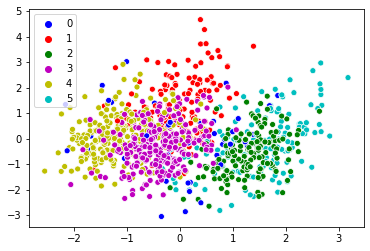

In [126]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = cluster, palette =['b', 'r', 'g', 'm', 'y', 'c'])

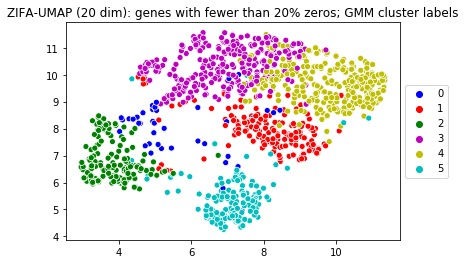

In [128]:
fig = sns.scatterplot(zumap[:,0], zumap[:,1], hue = cluster, palette =['b', 'r', 'g', 'm', 'y', 'c'])
fig.set_title('ZIFA-UMAP (20 dim): genes with fewer than 20% zeros; GMM cluster labels')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [99]:
km = KMeans(n_clusters = 6, random_state=42)
kmdata = km.fit_transform(dfz)
kpred = km.fit_predict(dfz)

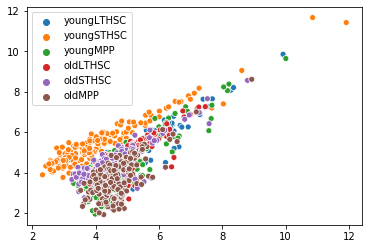

In [100]:
sns.scatterplot(kmdata[:,0], kmdata[:,1], hue = dfz.index)

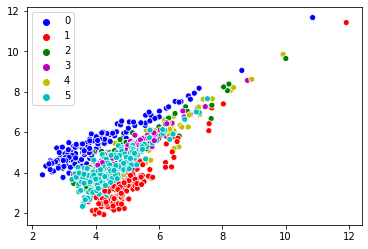

In [120]:
sns.scatterplot(kmdata[:,0], kmdata[:, 1], hue = kpred, palette =['b', 'r', 'g', 'm', 'y', 'c'])

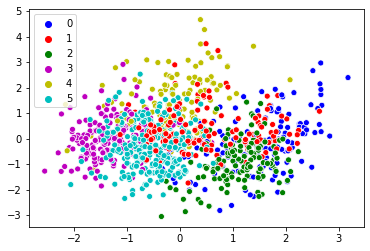

In [121]:
sns.scatterplot(zcomps[:,0], zcomps[:,1], hue = kpred, palette =['b', 'r', 'g', 'm', 'y', 'c'])

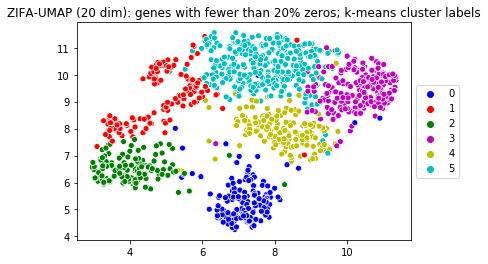

In [129]:
fig = sns.scatterplot(zumap[:,0], zumap[:,1], hue = kpred, palette =['b', 'r', 'g', 'm', 'y', 'c'])
fig.set_title('ZIFA-UMAP (20 dim): genes with fewer than 20% zeros; k-means cluster labels')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

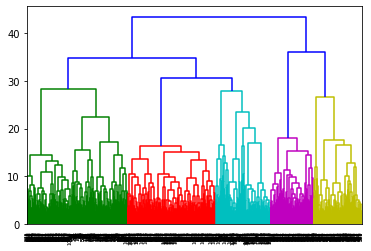

In [104]:
dendrogram(linkage(dfz, method = 'ward'))
plt.show()

In [105]:
dfcelltypes = pd.DataFrame(df2.mean(), columns = ['All cell average'])
dfcelltypes['youngLTHSC'] = df2[df2.index == 'youngLTHSC'].mean()
dfcelltypes['youngSTHSC'] = df2[df2.index == 'youngSTHSC'].mean()
dfcelltypes['youngMPP'] = df2[df2.index == 'youngMPP'].mean()
dfcelltypes['oldLTHSC'] = df2[df2.index == 'oldLTHSC'].mean()
dfcelltypes['oldSTHSC'] = df2[df2.index == 'oldSTHSC'].mean()
dfcelltypes['oldMPP'] = df2[df2.index == 'oldMPP'].mean()


In [106]:
dfcellbroad = pd.DataFrame(df2.mean(), columns = ['All cell average'])
dfcellbroad['HSC'] = df2[df2.index.str.contains('HSC')].mean()
dfcellbroad['MPP'] = df2[df2.index.str.contains('MPP')].mean()
dfcellbroad['HSC/MPP'] = dfcellbroad['HSC']/dfcellbroad['MPP']
dfcellbroad.sort_values(by = ['HSC/MPP','HSC','MPP'], ascending = False).head(25000)


All cell average  \
Efna1                                                       0.643544   
Epor                                                        0.195877   
A230065H16Rik                                               0.188853   
Entpd2                                                      0.118546   
uc012bnh.1                                                  0.012621   
Chst2                                                       0.390360   
Tenc1                                                       0.414738   
Sytl5                                                       0.261054   
Smtnl1                                                      0.344110   
Fkbp10                                                      0.207363   
Trim47                                                      0.618175   
Sdpr                                                        1.132630   
Prom2                                                       0.127064   
Gstm2                                                       0.393672   
Cldn5                                                       0.133280   
Nupr1                                                       2.090327   
Gpx3                                                        0.422264   
D630039A03Rik                                               0.693411   
Plxdc2                                                      0.888490   
Clip3                                                       0.347333   
Pde6h                                                       0.221191   
uc007cvp.1,uc007cvq.1                                       0.324404   
Snrpn                                                       0.428033   
Upp1                                                        0.927185   
Gm13986                                                     0.386996   
Ndn                                                         1.065439   
Tgm2                                                        2.373461   
Sult1a1                                                     1.656241   
Hid1                                                        0.731313   
Tgfb3                                                       0.188622   
Zfp612                                                      0.548159   
Eno2                                                        0.214290   
Hba-a2                                                      0.698456   
Mt2                                                         0.389157   
Tinagl1                                                     1.058981   
Reep2                                                       0.324417   
Ehd3                                                        0.907648   
Fam46c                                                      0.120244   
Fam110c                                                     0.711369   
Abcg3                                                       2.109270   
Clca1                                                       0.969792   
Vwf                                                         1.211336   
Clec1a                                                      1.491799   
Hbb-b1                                                      0.696732   
Kazald1                                                     0.335396   
Ocln                                                        0.451780   
Rprm                                                        0.116883   
Npdc1                                                       1.094193   
Mmrn1                                                       4.407780   
Clu                                                         1.038810   
Wfdc2                                                       0.509162   
Grb10                                                       2.193117   
Rhd                                                         0.059553   
Hgfac                                                       0.722850   
Gimap4                                                      0.461725   
Abcb1a              